In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/secom_cleaned.csv')

print("Loaded dataset shape:", df.shape)
print("Missing values in new dataframe:", df.isnull().sum().sum())
df.head()

Loaded dataset shape: (1567, 563)
Missing values in new dataframe: 0


,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 578,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [24]:
# seperate features x from target variable y

X = df.drop('label', axis=1)
y = df['label']

print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)

Features shape (X): (1567, 562)
Target shape (y): (1567,)


In [25]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,    # use %30 of data for testing
    random_state = 42,  # ensures the split is the same every time we run the code
    stratify=y          # CRITICAL for maintaining class distribution in an imbalanced dataset
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("\nTraining set label distribution:")
print(y_train.value_counts(normalize=True))
print("\nTraining set label distribution:")
print(y_test.value_counts(normalize=True))



X_train shape: (1096, 562)
X_test shape: (471, 562)

Training set label distribution:
label
-1    0.933394
 1    0.066606
Name: proportion, dtype: float64

Training set label distribution:
label
-1    0.934183
 1    0.065817
Name: proportion, dtype: float64


In [26]:
# initialize StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nScaled Training Data Head:")
X_train_scaled.head()


Scaled Training Data Head:


,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 577,Sensor 578,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590
0,0.411114,-1.763718,1.445417,0.087964,-0.052355,0.0,0.808720,-0.038033,0.240180,0.281144,...,-0.238695,-0.051869,-1.831816,-0.012871,-0.114843,-0.006674,0.298149,0.308950,0.281801,-0.260529
1,1.108252,-0.501873,0.267511,-0.252442,-0.032031,0.0,-0.915561,-0.038033,-0.596794,-0.941999,...,-0.203930,0.551158,-0.356821,-0.146423,-0.160349,-0.141830,-0.120091,-0.347801,-0.525180,-0.344685
2,-0.432037,0.490631,-1.786041,-0.718273,-0.042403,0.0,0.340915,0.080020,1.941169,0.708586,...,-0.227101,-0.349832,-0.501429,-0.309653,-0.296865,-0.298786,-0.230569,-1.243371,-1.295480,-0.717879
3,-1.750141,1.361429,1.077533,1.271988,-0.044073,0.0,-0.679968,0.056409,0.368633,0.090439,...,-0.227101,-0.349832,-1.369073,-0.121691,-0.205854,-0.114078,4.835660,0.416418,0.942058,-0.794578
4,0.795842,-1.480110,-2.361679,-1.196581,-0.044523,0.0,0.759438,0.398764,-0.358817,-0.685534,...,-0.243191,0.009969,0.366215,-0.220619,-0.296865,-0.214603,1.221434,-1.004553,-0.818628,-0.824264


<>:26: SyntaxWarning: invalid escape sequence '\-'
<>:26: SyntaxWarning: invalid escape sequence '\-'
/var/folders/z3/_55w_bvn49138t74d36fmr9c0000gn/T/ipykernel_3521/2236292020.py:26: SyntaxWarning: invalid escape sequence '\-'
  print("\--- Isolation Forest Results ---")


Training Isolation Forest Model...
\--- Isolation Forest Results ---
Classification Report:
              precision    recall  f1-score   support

   Fail (-1)       0.94      0.95      0.94       440
   Pass (+1)       0.17      0.16      0.17        31

    accuracy                           0.89       471
   macro avg       0.56      0.55      0.55       471
weighted avg       0.89      0.89      0.89       471

Confusion Matrix:


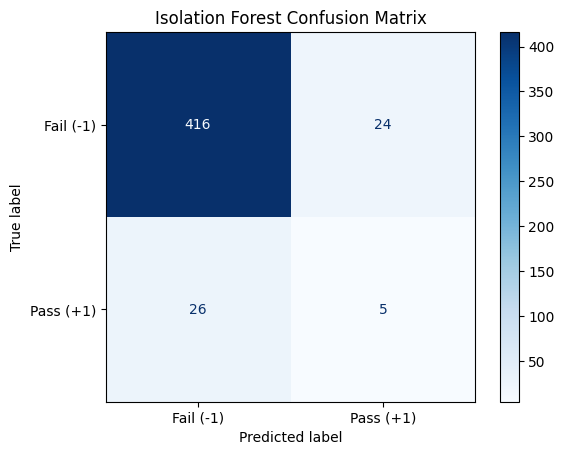

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# initialize model
# contamination parameter tells the model the expected proportion of anomalies in the dataset.
# In our case, the 'Pass (+1)' class is the rare one, which the model will see as the anomaly.
# We calculate its proportion from the training set.

pass_proportion = y_train.value_counts(normalize=True)[1]

iso_forest = IsolationForest(
    contamination=pass_proportion,
    random_state=42,
    n_estimators=100 #number of trees in the forest
)

# model learns from the features only, not the labels
iso_forest.fit(X_train_scaled)
# make predictions on the test set
y_pred_iso = iso_forest.predict(X_test_scaled)

# map predictions to match our labels
# map: model's 1 -> our -1 (Fail), model's -1 -> our 1 (Pass)
y_pred_iso_mapped = np.where(y_pred_iso == 1 ,-1, 1)
print("\--- Isolation Forest Results ---")

# evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred_iso_mapped, target_names=['Fail (-1)', 'Pass (+1)']))

#visualize confusion matrix
print("Confusion Matrix:")
cm_iso = confusion_matrix(y_test, y_pred_iso_mapped)
disp_iso = ConfusionMatrixDisplay(confusion_matrix=cm_iso, display_labels=['Fail (-1)', 'Pass (+1)'])
disp_iso.plot(cmap=plt.cm.Blues)
plt.title('Isolation Forest Confusion Matrix')
plt.show()


Training One-Class SVM model...

--- One-Class SVM Results ---
Classification Report:
              precision    recall  f1-score   support

   Fail (-1)       0.94      0.93      0.93       440
   Pass (+1)       0.11      0.13      0.12        31

    accuracy                           0.88       471
   macro avg       0.53      0.53      0.53       471
weighted avg       0.88      0.88      0.88       471

Confusion Matrix:


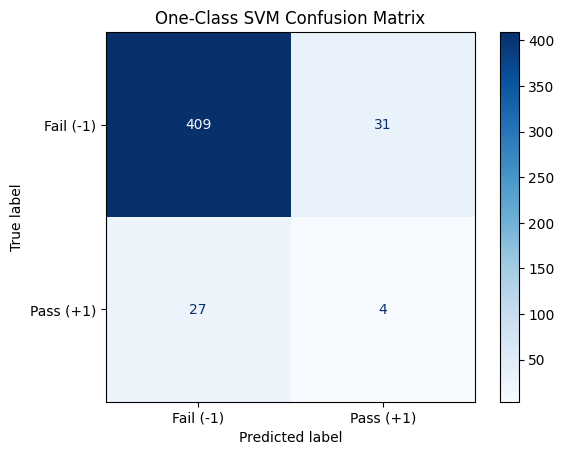

In [ ]:
from sklearn.svm import OneClassSVM

# one-class svm model
oc_svm = OneClassSVM(
    gamma='auto',
    nu=pass_proportion
)

oc_svm.fit(X_train_scaled)

y_pred_svm = oc_svm.predict(X_test_scaled)
y_pred_svm_mapped = np.where(y_pred_svm == 1, -1, 1)

print("\n--- One-Class SVM Results ---")

# model performance
print("Classification Report:")
print(classification_report(y_test, y_pred_svm_mapped, target_names=['Fail (-1)', 'Pass (+1)']))

print("Confusion Matrix:")
cm_svm = confusion_matrix(y_test, y_pred_svm_mapped)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Fail (-1)','Pass (+1)'])
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('One-Class SVM Confusion Matrix')
plt.show()